In [2]:
import pandas as pd

file_path = r"C:\Users\Ольга\ВКР Карпенко\data markup\filtered_interfax_data.xlsx"

# Load data
df = pd.read_excel(file_path)
df

,Дата,Текст,Label
0,2025-01-30 16:23:07,🔺**Минюст РФ зарегистрировал указание о повыше...,0.0
1,2025-01-30 16:04:54,"🛢**Brent подорожала до $77,35 за баррель**\n\n...",0.0
2,2025-01-30 16:01:07,**🇷🇺Рынок акций РФ поднялся к 2970п по индексу...,0.0
3,2025-01-30 14:35:27,"💵💶**Официальные курсы ЦБ РФ с 31 января - 98,0...",0.0
4,2025-01-30 13:38:04,**ЦБ и Мосбиржа запускают программу создания а...,0.0
...,...,...,...
1514,2025-04-01 06:36:27,"🛒**ГК ""О'Кей"" в 2024 году увеличила EBITDA на ...",1.0
1515,2025-04-01 06:11:33,**🔻Индекс PMI обрабатывающих отраслей РФ в мар...,0.0
1516,2025-04-01 06:05:38,**ЦБ РФ ввел категорию инвесторов с начальным ...,0.0
1517,2025-04-01 05:56:12,"🛢**Brent подорожала до $74,92 за баррель**\n\n...",0.0


In [3]:
invalid_rows = df[df['Текст'].isnull() | (df['Текст'].apply(lambda x: not isinstance(x, str)))]
print(invalid_rows[['Дата', 'Текст']].head(10))

                     Дата Текст
68    2025-01-27 07:48:28   NaN
1176  2025-04-24 07:06:34   NaN


In [4]:
df_cleaned = df[df['Текст'].apply(lambda x: isinstance(x, str) and len(x.strip()) > 0)]
df_cleaned

,Дата,Текст,Label
0,2025-01-30 16:23:07,🔺**Минюст РФ зарегистрировал указание о повыше...,0.0
1,2025-01-30 16:04:54,"🛢**Brent подорожала до $77,35 за баррель**\n\n...",0.0
2,2025-01-30 16:01:07,**🇷🇺Рынок акций РФ поднялся к 2970п по индексу...,0.0
3,2025-01-30 14:35:27,"💵💶**Официальные курсы ЦБ РФ с 31 января - 98,0...",0.0
4,2025-01-30 13:38:04,**ЦБ и Мосбиржа запускают программу создания а...,0.0
...,...,...,...
1514,2025-04-01 06:36:27,"🛒**ГК ""О'Кей"" в 2024 году увеличила EBITDA на ...",1.0
1515,2025-04-01 06:11:33,**🔻Индекс PMI обрабатывающих отраслей РФ в мар...,0.0
1516,2025-04-01 06:05:38,**ЦБ РФ ввел категорию инвесторов с начальным ...,0.0
1517,2025-04-01 05:56:12,"🛢**Brent подорожала до $74,92 за баррель**\n\n...",0.0


In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

texts = df_cleaned['Текст'].dropna().astype(str).tolist()
labels = df_cleaned['Label'].tolist()

texts_train, texts_val, labels_train, labels_val = train_test_split(texts, labels, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(texts_train)
X_val = vectorizer.transform(texts_val)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, labels_train)

val_preds = lr_model.predict(X_val)

accuracy = accuracy_score(labels_val, val_preds)
precision = precision_score(labels_val, val_preds, zero_division=0)
recall = recall_score(labels_val, val_preds, zero_division=0)
f1 = f1_score(labels_val, val_preds, zero_division=0)

print("Model: TF-IDF + Logistic Regression")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1: {f1:.4f}")

tfidf_lr_results = {
    'Accuracy': round(accuracy, 4),
    'Precision': round(precision, 4),
    'Recall': round(recall, 4),
    'F1': round(f1, 4)
}


Model: TF-IDF + Logistic Regression
Accuracy: 0.9309
Precision: 0.9583
Recall: 0.7931
F1: 0.8679


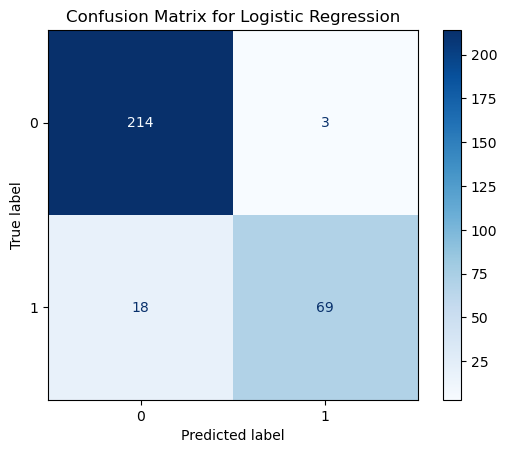

In [122]:
cm = confusion_matrix(labels_val, val_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

texts = df_cleaned['Текст'].dropna().astype(str).tolist()
labels = df_cleaned['Label'].tolist()

texts_train, texts_val, labels_train, labels_val = train_test_split(texts, labels, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(texts_train)
X_val = vectorizer.transform(texts_val)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, labels_train)

val_preds = rf_model.predict(X_val)

accuracy = accuracy_score(labels_val, val_preds)
precision = precision_score(labels_val, val_preds, zero_division=0)
recall = recall_score(labels_val, val_preds, zero_division=0)
f1 = f1_score(labels_val, val_preds, zero_division=0)

print("Model: TF-IDF + Random Forest")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1: {f1:.4f}")

tfidf_rf_results = {
    'Accuracy': round(accuracy, 4),
    'Precision': round(precision, 4),
    'Recall': round(recall, 4),
    'F1': round(f1, 4)
}

Model: TF-IDF + Random Forest
Accuracy: 0.9375
Precision: 0.9474
Recall: 0.8276
F1: 0.8834


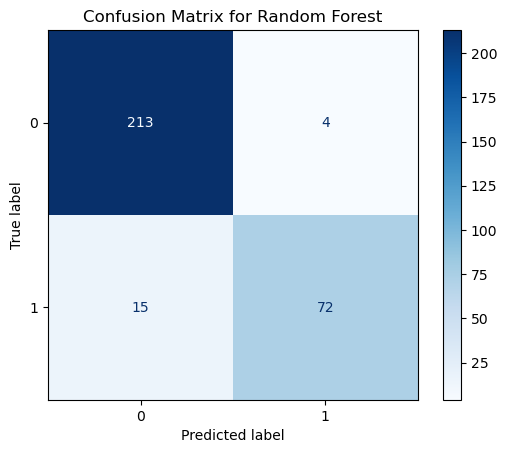

In [124]:
cm_rf = confusion_matrix(labels_val, val_preds)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import numpy as np

texts = df_cleaned['Текст'].dropna().astype(str).tolist()
labels = df_cleaned['Label'].tolist()

texts_train, texts_val, labels_train, labels_val = train_test_split(texts, labels, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(texts_train)
X_val = vectorizer.transform(texts_val)

xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, labels_train)

val_preds = xgb_model.predict(X_val)

accuracy = accuracy_score(labels_val, val_preds)
precision = precision_score(labels_val, val_preds, zero_division=0)
recall = recall_score(labels_val, val_preds, zero_division=0)
f1 = f1_score(labels_val, val_preds, zero_division=0)

print("Model: TF-IDF + XGBoost")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1: {f1:.4f}")

tfidf_xgb_results = {
    'Accuracy': round(accuracy, 4),
    'Precision': round(precision, 4),
    'Recall': round(recall, 4),
    'F1': round(f1, 4)
}

Model: TF-IDF + XGBoost
Accuracy: 0.9309
Precision: 0.8929
Recall: 0.8621
F1: 0.8772


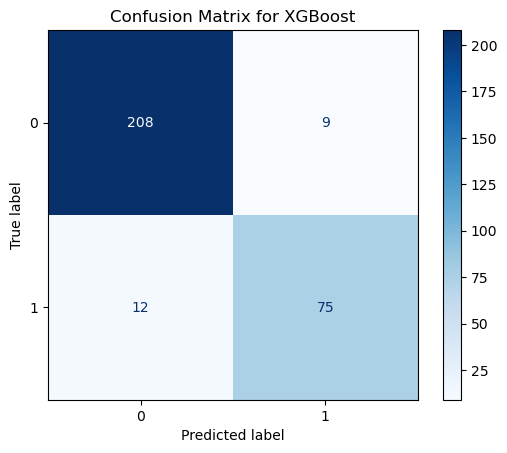

In [127]:
cm_xgb = confusion_matrix(labels_val, val_preds)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot(cmap='Blues')
plt.title('Confusion Matrix for XGBoost')
plt.show()

## GridSearch

In [128]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='f1', verbose=2, n_jobs=-1)
grid_search.fit(X_train, labels_train)

print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


C:\Games\123\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:20:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best F1 score: 0.8802949679629285


In [129]:
best_params = {
    'colsample_bytree': 0.7,
    'learning_rate': 0.2,
    'max_depth': 3,
    'n_estimators': 200,
    'subsample': 1.0
}

xgb_best_model = XGBClassifier(**best_params, random_state=42, eval_metric='logloss')
xgb_best_model.fit(X_train, labels_train)

val_preds_best = xgb_best_model.predict(X_val)

accuracy_best = accuracy_score(labels_val, val_preds_best)
precision_best = precision_score(labels_val, val_preds_best, zero_division=0)
recall_best = recall_score(labels_val, val_preds_best, zero_division=0)
f1_best = f1_score(labels_val, val_preds_best, zero_division=0)

print("Model: TF-IDF + XGBoost (Best Params)")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1: {f1_best:.4f}")

tfidf_xgb_best_results = {
    'Accuracy': round(accuracy_best, 4),
    'Precision': round(precision_best, 4),
    'Recall': round(recall_best, 4),
    'F1': round(f1_best, 4)
}

Model: TF-IDF + XGBoost (Best Params)
Accuracy: 0.9474
Precision: 0.9277
Recall: 0.8851
F1: 0.9059


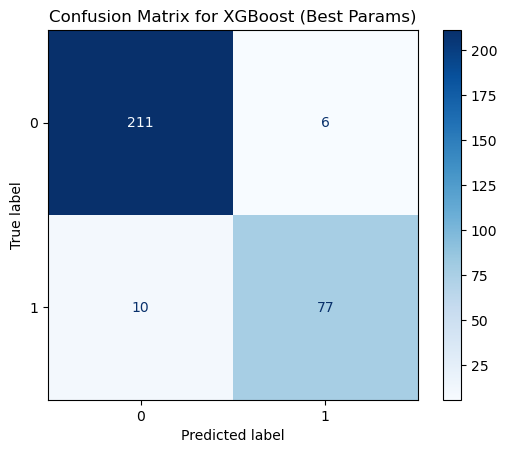

In [130]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_best = confusion_matrix(labels_val, val_preds_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot(cmap='Blues')
plt.title('Confusion Matrix for XGBoost (Best Params)')
plt.show()

In [109]:
from collections import Counter
class_counts = Counter(labels_train)
n_neg = class_counts[0]
n_pos = class_counts[1]
scale_pos_weight = n_neg / n_pos
print(f"scale_pos_weight: {scale_pos_weight:.2f}")

best_params = {
    'colsample_bytree': 0.7,
    'learning_rate': 0.2,
    'max_depth': 3,
    'n_estimators': 200,
    'subsample': 1.0
}


xgb_best_weighted_model = XGBClassifier(**best_params, random_state=42, eval_metric='logloss')
xgb_best_weighted_model.fit(X_train, labels_train)

val_preds_weighted = xgb_best_weighted_model.predict(X_val)

accuracy_weighted = accuracy_score(labels_val, val_preds_weighted)
precision_weighted = precision_score(labels_val, val_preds_weighted, zero_division=0)
recall_weighted = recall_score(labels_val, val_preds_weighted, zero_division=0)
f1_weighted = f1_score(labels_val, val_preds_weighted, zero_division=0)

print("Model: TF-IDF + XGBoost (Best Params + Weighted Signal)")
print(f"Accuracy: {accuracy_weighted:.4f}")
print(f"Precision: {precision_weighted:.4f}")
print(f"Recall: {recall_weighted:.4f}")
print(f"F1: {f1_weighted:.4f}")

tfidf_xgb_best_weighted_results = {
    'Accuracy': round(accuracy_weighted, 4),
    'Precision': round(precision_weighted, 4),
    'Recall': round(recall_weighted, 4),
    'F1': round(f1_weighted, 4)
}

scale_pos_weight: 3.14
Model: TF-IDF + XGBoost (Best Params + Weighted Signal)
Accuracy: 0.9474
Precision: 0.9277
Recall: 0.8851
F1: 0.9059


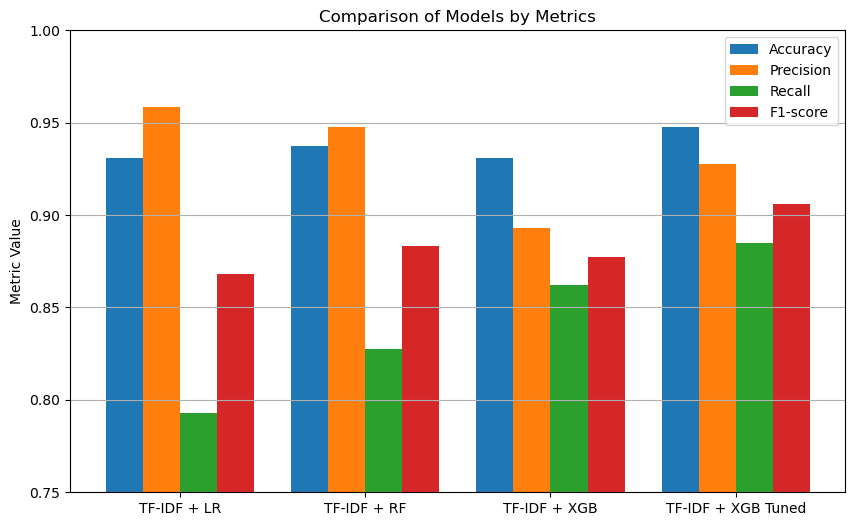

In [131]:
import numpy as np

models = ['TF-IDF + LR', 'TF-IDF + RF', 'TF-IDF + XGB', 'TF-IDF + XGB Tuned']
accuracy = [tfidf_lr_results['Accuracy'], tfidf_rf_results['Accuracy'], tfidf_xgb_results['Accuracy'], tfidf_xgb_best_results['Accuracy']]
precision = [tfidf_lr_results['Precision'], tfidf_rf_results['Precision'], tfidf_xgb_results['Precision'], tfidf_xgb_best_results['Precision']]
recall = [tfidf_lr_results['Recall'], tfidf_rf_results['Recall'], tfidf_xgb_results['Recall'], tfidf_xgb_best_results['Recall']]
f1 = [tfidf_lr_results['F1'], tfidf_rf_results['F1'], tfidf_xgb_results['F1'], tfidf_xgb_best_results['F1']]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, f1, width, label='F1-score')

plt.ylabel('Metric Value')
plt.title('Comparison of Models by Metrics')
plt.xticks(x, models)
plt.ylim(0.75, 1)
plt.legend()
plt.grid(axis='y')
plt.show()


In [132]:
xgb_best_weighted_model.save_model('xgb_best_weighted_model.json')

In [133]:
import joblib
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [137]:
vectorizer_loaded = joblib.load('tfidf_vectorizer.joblib')

sample_texts = [
    """
    "Транснефть" планирует направить на дивиденды за 2024 год 198,25 руб. на акцию
    Совет директоров "Транснефти" рекомендовал по итогам 2024 года направить на дивиденды 143,7 млрд рублей, или 198,25 руб. на акцию, сообщила компания.
    Согласно консенсусу, составленному "Интерфаксу" по итогам опроса аналитиков, рынок оценивал дивиденды "Транснефти" за 2024 год в 188,1 руб./акция.
    """,
    """
   Уолл-стрит закрылась без единой динамики в пятницу

Американские фондовые индексы завершили торги пятницы разнонаправленными изменениями, инвесторы оценивали статданные, новости компаний и развитие событий во внешнеторговой политике.

Трамп в пятницу обвинил китайские власти в нарушении заключенных со Штатами в Женеве торговых договоренностей. Он также отметил, что надеется обсудить торговые договоренности напрямую с председателем КНР Си Цзиньпином.
.
    """
]

X_samples = vectorizer_loaded.transform(sample_texts)

xgb_loaded_model = XGBClassifier()
xgb_loaded_model.load_model('xgb_best_weighted_model.json')

predictions = xgb_loaded_model.predict(X_samples)

for i, pred in enumerate(predictions, 1):
    print(f"Predicted class for sample {i}: {pred}")


Predicted class for sample 1: 1
Predicted class for sample 2: 0


## RuBert

In [138]:
from transformers import AutoTokenizer, AutoModel

model_name = "sberbank-ai/ruBert-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Получаем конфиг
config = model.config
print(config)  
print(config.num_hidden_layers)  
print(config.hidden_size)  
print(config.vocab_size)  

C:\Games\123\Lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


BertConfig {
  "_name_or_path": "sberbank-ai/ruBert-base",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.32.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 120138
}

12
768
120138


In [139]:
import torch
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
model_name = "sberbank-ai/ruBert-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

texts = df_cleaned['Текст'].dropna().astype(str).tolist()
labels = df_cleaned['Label'].tolist()

texts_train, texts_val, labels_train, labels_val = train_test_split(texts, labels, test_size=0.2, random_state=42)

def get_embeddings(texts):
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding='max_length', max_length=128)
        with torch.no_grad():
            outputs = model(**inputs)
            cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()
            embeddings.append(cls_embedding)
    return np.array(embeddings)

X_train = get_embeddings(texts_train)
X_val = get_embeddings(texts_val)

In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, labels_train)

val_preds = lr_model.predict(X_val)
val_probs = lr_model.predict_proba(X_val)[:, 1]

accuracy = accuracy_score(labels_val, val_preds)
precision = precision_score(labels_val, val_preds, zero_division=0)
recall = recall_score(labels_val, val_preds, zero_division=0)
f1 = f1_score(labels_val, val_preds, zero_division=0)

print("Model: sber_RuBert+LogisticRegression")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1: {f1:.4f}")

logreg_results = {
    'Accuracy': round(accuracy, 4),
    'Precision': round(precision, 4),
    'Recall': round(recall, 4),
    'F1': round(f1, 4)
}

Model: sber_RuBert+LogisticRegression
Accuracy: 0.9178
Precision: 0.8974
Recall: 0.8046
F1: 0.8485


In [141]:
from xgboost import XGBClassifier
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

n_neg = np.sum(np.array(labels_train) == 0)
n_pos = np.sum(np.array(labels_train) == 1)
scale_pos_weight = n_neg / n_pos

xgb_model = XGBClassifier(random_state=42, eval_metric='logloss',
                          scale_pos_weight=scale_pos_weight)
xgb_model.fit(X_train, labels_train)

val_preds = xgb_model.predict(X_val)

accuracy = accuracy_score(labels_val, val_preds)
precision = precision_score(labels_val, val_preds, zero_division=0)
recall = recall_score(labels_val, val_preds, zero_division=0)
f1 = f1_score(labels_val, val_preds, zero_division=0)

print("Model: RuBERT + XGBoost (weighted)")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1: {f1:.4f}")

xgb_results = {
    'Accuracy': round(accuracy, 4),
    'Precision': round(precision, 4),
    'Recall': round(recall, 4),
    'F1': round(f1, 4)
}

C:\Games\123\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:06:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model: RuBERT + XGBoost (weighted)
Accuracy: 0.9243
Precision: 0.9000
Recall: 0.8276
F1: 0.8623


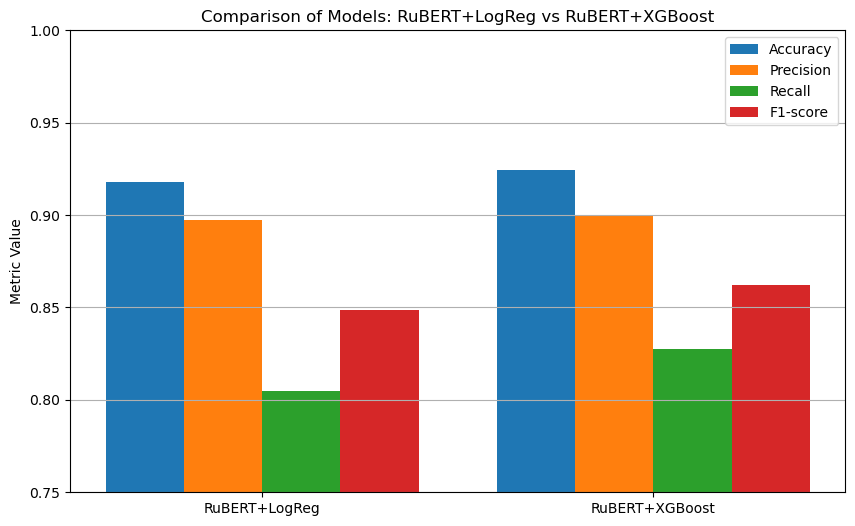

In [143]:
models = ['RuBERT+LogReg', 'RuBERT+XGBoost']
accuracy = [logreg_results['Accuracy'], xgb_results['Accuracy']]
precision = [logreg_results['Precision'], xgb_results['Precision']]
recall = [logreg_results['Recall'], xgb_results['Recall']]
f1 = [logreg_results['F1'], xgb_results['F1']]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, f1, width, label='F1-score')

plt.ylabel('Metric Value')
plt.title('Comparison of Models: RuBERT+LogReg vs RuBERT+XGBoost')
plt.xticks(x, models)
plt.ylim(0.75, 1)
plt.legend()
plt.grid(axis='y')
plt.show()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sberbank-ai/ruBert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/3: 100%|████████████████████████████████████████████████████████| 152/152 [07:28<00:00,  2.95s/it, loss=0.0662]


Epoch 1 Train Loss: 0.2283
Epoch 1 Val Loss: 0.1291 | Acc: 0.9507 | Prec: 0.8913 | Rec: 0.9425 | F1: 0.9162


Epoch 2/3: 100%|█████████████████████████████████████████████████████████| 152/152 [07:34<00:00,  2.99s/it, loss=0.529]


Epoch 2 Train Loss: 0.1102
Epoch 2 Val Loss: 0.1261 | Acc: 0.9474 | Prec: 0.8901 | Rec: 0.9310 | F1: 0.9101


Epoch 3/3: 100%|██████████████████████████████████████████████████████████| 152/152 [07:01<00:00,  2.77s/it, loss=0.33]


Epoch 3 Train Loss: 0.0642
Epoch 3 Val Loss: 0.1491 | Acc: 0.9572 | Prec: 0.9111 | Rec: 0.9425 | F1: 0.9266


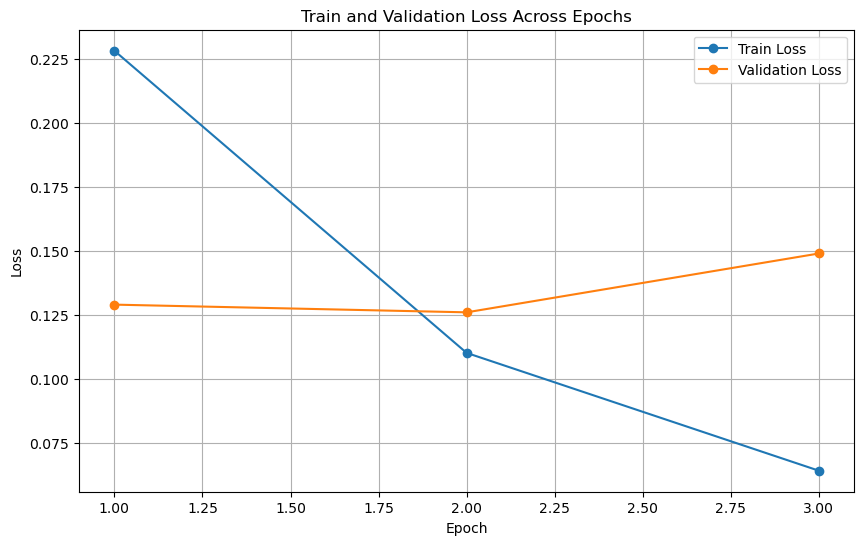

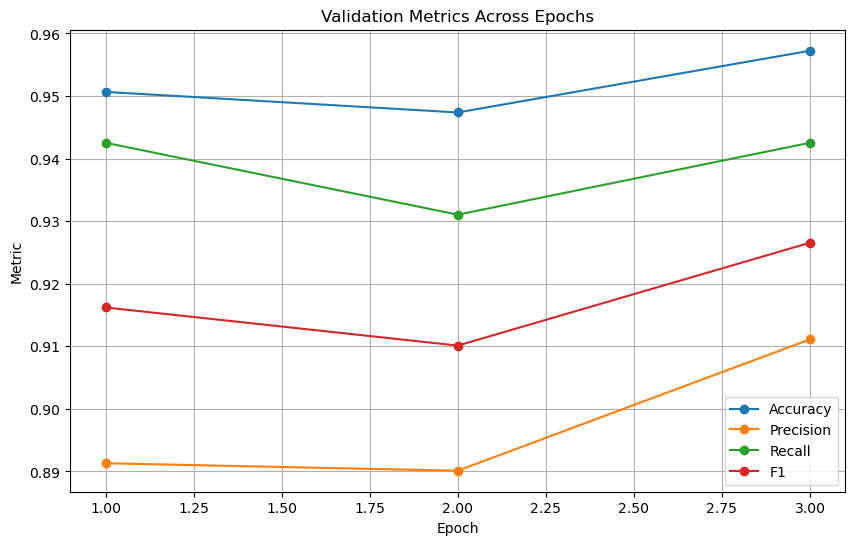

{'RuBERT fine-tuned (manual)': {'Accuracy': 0.9572, 'Precision': 0.9111, 'Recall': 0.9425, 'F1': 0.9266}}


In [6]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
from torch.optim import AdamW
from tqdm import tqdm
import matplotlib.pyplot as plt

texts = df_cleaned['Текст'].dropna().astype(str).tolist()
labels = df_cleaned['Label'].tolist()
texts_train, texts_val, labels_train, labels_val = train_test_split(texts, labels, test_size=0.2, random_state=42)

model_name = "sberbank-ai/ruBert-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

class CustomDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encodings = tokenizer(self.texts[idx], truncation=True, padding='max_length', max_length=128, return_tensors='pt')
        item = {key: val.squeeze() for key, val in encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

train_dataset = CustomDataset(texts_train, labels_train)
val_dataset = CustomDataset(texts_val, labels_val)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)

epochs = 3
train_losses = []
val_losses = []
val_accuracies, val_precisions, val_recalls, val_f1s = [], [], [], []

for epoch in range(epochs):
    # Training
    model.train()
    total_loss = 0
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")
    for batch in loop:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        loop.set_postfix(loss=loss.item())
    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"Epoch {epoch+1} Train Loss: {avg_train_loss:.4f}")
    
    model.eval()
    val_total_loss = 0
    val_preds, val_true = [], []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            val_total_loss += outputs.loss.item()
            preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
            val_preds.extend(preds)
            val_true.extend(labels.cpu().numpy())
    avg_val_loss = val_total_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    
    accuracy = accuracy_score(val_true, val_preds)
    precision = precision_score(val_true, val_preds, zero_division=0)
    recall = recall_score(val_true, val_preds, zero_division=0)
    f1 = f1_score(val_true, val_preds, zero_division=0)
    val_accuracies.append(accuracy)
    val_precisions.append(precision)
    val_recalls.append(recall)
    val_f1s.append(f1)
    
    print(f"Epoch {epoch+1} Val Loss: {avg_val_loss:.4f} | Acc: {accuracy:.4f} | Prec: {precision:.4f} | Rec: {recall:.4f} | F1: {f1:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), train_losses, marker='o', label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, marker='o', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss Across Epochs')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), val_accuracies, marker='o', label='Accuracy')
plt.plot(range(1, epochs+1), val_precisions, marker='o', label='Precision')
plt.plot(range(1, epochs+1), val_recalls, marker='o', label='Recall')
plt.plot(range(1, epochs+1), val_f1s, marker='o', label='F1')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Validation Metrics Across Epochs')
plt.grid()
plt.legend()
plt.show()

results_summary = {}
results_summary['RuBERT fine-tuned (manual)'] = {
    'Accuracy': round(val_accuracies[-1], 4),
    'Precision': round(val_precisions[-1], 4),
    'Recall': round(val_recalls[-1], 4),
    'F1': round(val_f1s[-1], 4)
}
print(results_summary)


## Archive

In [10]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
from torch.optim import AdamW
from tqdm import tqdm

texts = df_cleaned['Текст'].dropna().astype(str).tolist()
labels = df_cleaned['Label'].tolist()
texts_train, texts_val, labels_train, labels_val = train_test_split(texts, labels, test_size=0.2, random_state=42)

model_name = "sberbank-ai/ruBert-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

class CustomDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encodings = tokenizer(self.texts[idx], truncation=True, padding='max_length', max_length=128, return_tensors='pt')
        item = {key: val.squeeze() for key, val in encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

train_dataset = CustomDataset(texts_train, labels_train)
val_dataset = CustomDataset(texts_val, labels_val)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)

epochs = 1
for epoch in range(epochs):
    model.train()
    total_loss = 0
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")
    for batch in loop:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        loop.set_postfix(loss=loss.item())
    print(f"Epoch {epoch+1} Train Loss: {total_loss / len(train_loader):.4f}")

model.eval()
val_preds = []
val_true = []
with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
        val_preds.extend(preds)
        val_true.extend(labels.cpu().numpy())

accuracy = accuracy_score(val_true, val_preds)
precision = precision_score(val_true, val_preds, zero_division=0)
recall = recall_score(val_true, val_preds, zero_division=0)
f1 = f1_score(val_true, val_preds, zero_division=0)

results_summary = {}
results_summary['RuBERT fine-tuned (manual)'] = {
    'Accuracy': round(accuracy, 4),
    'Precision': round(precision, 4),
    'Recall': round(recall, 4),
    'F1': round(f1, 4)
}

print(results_summary)

C:\Games\123\Lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sberbank-ai/ruBert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/1: 100%|████████████████████████████████████████████████████████| 152/152 [13:43<00:00,  5.41s/it, loss=0.0346]


Epoch 1 Train Loss: 0.2344
{'RuBERT fine-tuned (manual)': {'Accuracy': 0.9507, 'Precision': 0.883, 'Recall': 0.954, 'F1': 0.9171}}


<Figure size 1000x600 with 0 Axes>

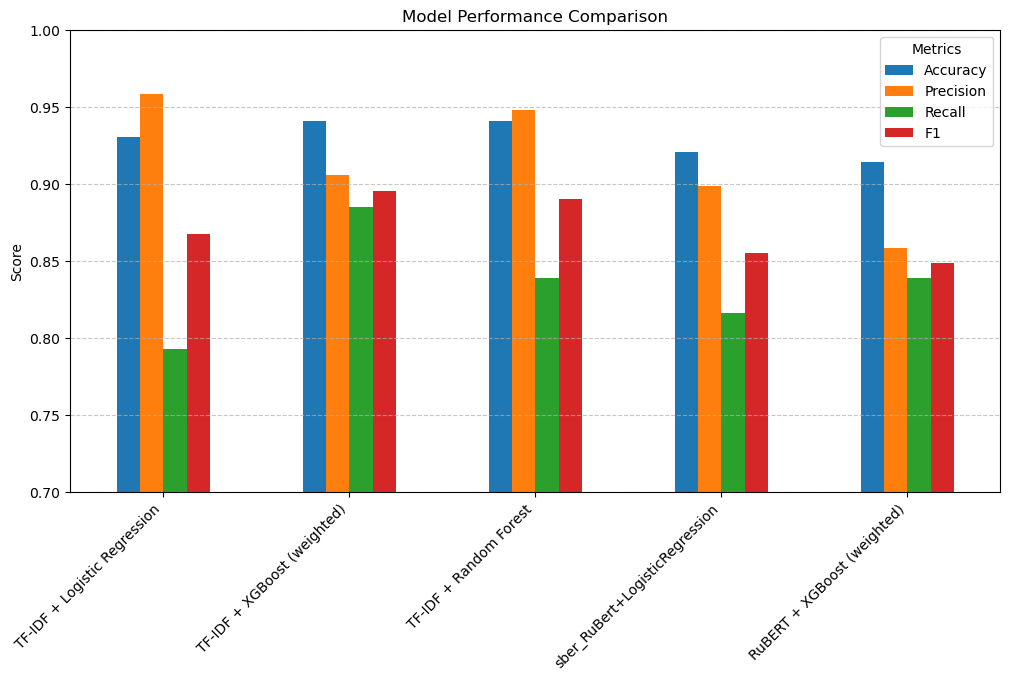

In [57]:
import matplotlib.pyplot as plt

df = pd.DataFrame(results_summary).T

plt.figure(figsize=(10, 6))
df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0.7, 1)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metrics')
plt.show()

In [22]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def nli_zero_shot_classification(texts, labels, model_checkpoint='cointegrated/rubert-base-cased-nli-threeway', 
                                 hypotheses=None, exclude_keywords=None, entailment_threshold=0.5, device=None):
    """
    Performs zero-shot classification using an NLI model with multiple hypotheses and optional filtering.

    """
    if hypotheses is None:
        hypotheses = [
            "Текст содержит официальное раскрытие информации компанией о своей деятельности.",
            "Компания публикует информацию о событиях, произошедших в ней.",
            "Новость касается обязательной корпоративной информации, раскрытой компанией.",
            "Регулятор сделал заявление относительно этой компании"
        ]

    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
    model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)
    model.to(device)

    if exclude_keywords:
        filtered_texts, filtered_labels = [], []
        for text, label in zip(texts, labels):
            if not any(keyword.lower() in text.lower() for keyword in exclude_keywords):
                filtered_texts.append(text)
                filtered_labels.append(label)
        texts, labels = filtered_texts, filtered_labels

    predicted_labels = []

    print("🔍 Starting NLI-based zero-shot classification...")
    for text in tqdm(texts):
        entailment_scores = []
        with torch.inference_mode():
            for hypo in hypotheses:
                inputs = tokenizer(text, hypo, return_tensors='pt', truncation=True, padding=True).to(device)
                outputs = model(**inputs)
                proba = torch.softmax(outputs.logits, -1).cpu().numpy()[0]
                entailment_scores.append(proba[model.config.label2id['entailment']])
        max_score = max(entailment_scores)
        predicted_label = 1 if max_score > entailment_threshold else 0
        predicted_labels.append(predicted_label)

    # Metrics
    accuracy = accuracy_score(labels, predicted_labels)
    precision = precision_score(labels, predicted_labels)
    recall = recall_score(labels, predicted_labels)
    f1 = f1_score(labels, predicted_labels)

    df_results = pd.DataFrame({
        "Text": texts,
        "True_Label": labels,
        "Predicted_Label": predicted_labels
    })

    metrics = {
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1": round(f1, 4)
    }

    print(f" NLI-based classification results:\n{metrics}")
    return df_results, metrics


In [24]:
texts = df_cleaned['Текст'].dropna().astype(str).tolist()
labels = df_cleaned['Label'].tolist()

results_df, metrics = nli_zero_shot_classification(texts, labels)

print(results_df.head())


C:\Games\123\Lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


🔍 Starting NLI-based zero-shot classification...


100%|██████████████████████████████████████████████████████████████████████████████| 1517/1517 [31:42<00:00,  1.25s/it]

🎯 NLI-based classification results:
{'Accuracy': 0.41, 'Precision': 0.2975, 'Recall': 1.0, 'F1': 0.4586}
                                                Text  True_Label  \
0  🔺**Минюст РФ зарегистрировал указание о повыше...         0.0   
1  🛢**Brent подорожала до $77,35 за баррель**\n\n...         0.0   
2  **🇷🇺Рынок акций РФ поднялся к 2970п по индексу...         0.0   
3  💵💶**Официальные курсы ЦБ РФ с 31 января - 98,0...         0.0   
4  **ЦБ и Мосбиржа запускают программу создания а...         0.0   

   Predicted_Label  
0                1  
1                1  
2                1  
3                0  
4                1  
